In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
# Lokking at the data to observe X and y i.e. input and output
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Observing the shape of train and test data
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

# Taking insights from the dataset(EDA)

Text(0, 0.5, 'SalePrice')

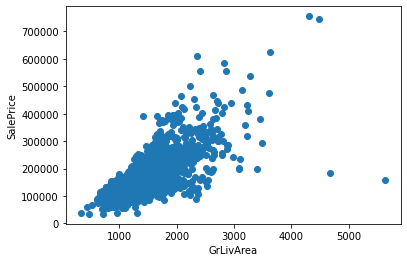

In [7]:
# Observing the Column output GrLivArea against Output SalePrice
# To check for outliers
plt.scatter(train_df.GrLivArea, train_df.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

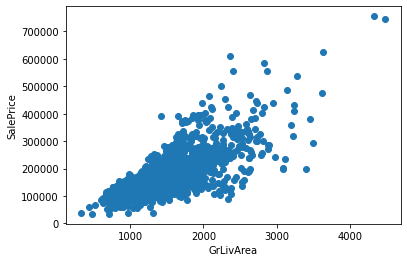

In [8]:
# Removing the outliers
train_df = train_df.drop(train_df[
    (train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)
plt.scatter(train_df.GrLivArea, train_df.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [9]:
# Checking the shape of train data again
train_df.shape

(1458, 81)

c:\users\rahul\housing project\housing_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180932.92 and sigma = 79467.79



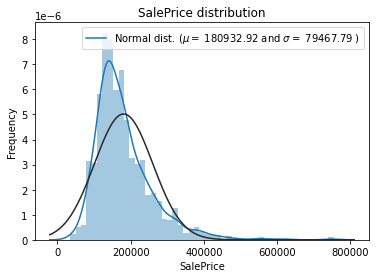

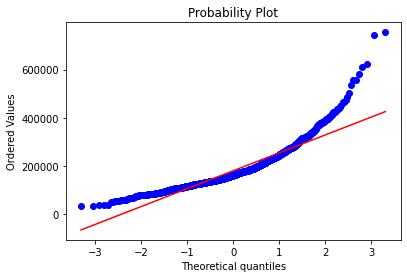

In [10]:
# Analysing the Saleprice variable.
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(train_df['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

c:\users\rahul\housing project\housing_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



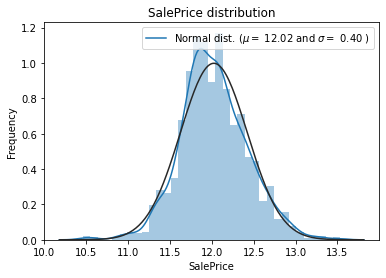

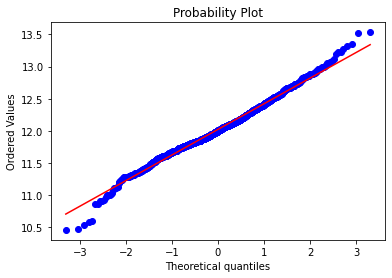

In [11]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution 
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [12]:
train_df.shape, test_df.shape

((1458, 81), (1459, 80))

In [13]:
#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

print("train shape before dropping id: {}".format(train_df.shape))
print("test shape before dropping id: {}".format(test_df.shape))
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

print("train shape after dropping id: {}".format(train_df.shape))
print("test shape after dropping id: {}".format(test_df.shape))

train shape before dropping id: (1458, 81)
test shape before dropping id: (1459, 80)
train shape after dropping id: (1458, 80)
test shape after dropping id: (1459, 79)


Text(0, 0.5, 'SalePrice')

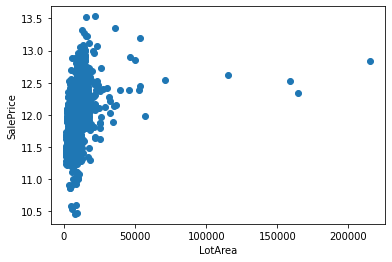

In [14]:
# Analysing the LotArea Feature against SalePrice
plt.scatter(train_df.LotArea, train_df.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
# it shows outliers in it

<h6>We will not remove outliers
from every feature as it may affect the model
since test set will have outliers too and our model 
needs to be robust against them </h6>

Text(0, 0.5, 'SalePrice')

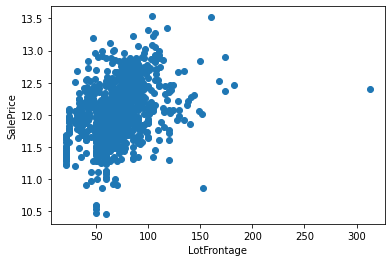

In [15]:
# Analysing Lotfrontage against SalePrice
plt.scatter(train_df.LotFrontage, train_df.SalePrice)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

In [16]:
# Analysing the OverallQual feature to draw pie chart
train_df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     16
2       3
1       2
Name: OverallQual, dtype: int64

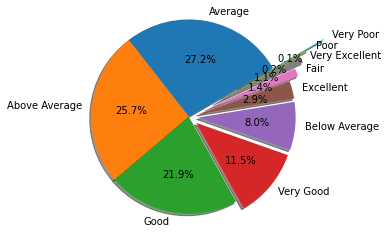

In [17]:
labels = ['Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor' ]
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
ax.pie(train_df['OverallQual'].value_counts(), explode=explode,
       labels=labels, autopct='%1.1f%%', shadow=True, startangle=30)
ax.axis('equal')
plt.show()

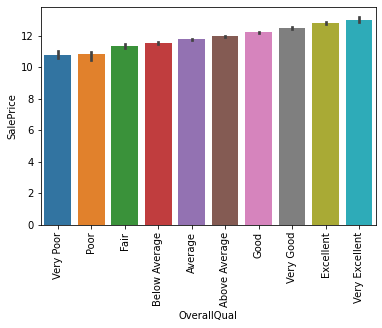

In [18]:
# Analysing OverallQual against SalePrice in barplot
import seaborn as sns
fig = sns.barplot(x='OverallQual', y='SalePrice', data=train_df)
fig.set_xticklabels(labels=['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent'], rotation=90);

In [19]:
# Analysing FOundation feature for pie chart
train_df['Foundation'].value_counts()

PConc     645
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

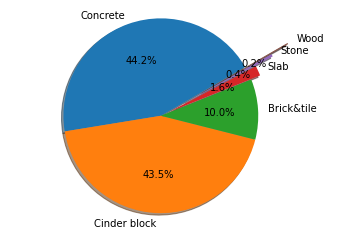

In [20]:
labels = ['Concrete', 'Cinder block', 'Brick&tile', 'Slab', 'Stone', 'Wood']
explode = (0, 0.0, 0.0, 0.1, 0.3, 0.5)

fig, ax = plt.subplots()
ax.pie(train_df['Foundation'].value_counts(), explode=explode,
       labels=labels, autopct='%1.1f%%', shadow=True, startangle=30)
ax.axis('equal')
plt.show()

Text(0.5, 0, 'Types of Foundation')

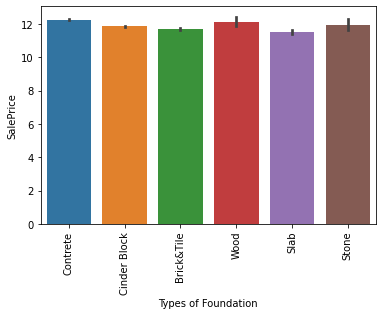

In [21]:
# Analysing FOundation against SalePrice for barplot
fig1=sns.barplot(x='Foundation', y='SalePrice', data=train_df)
fig1.set_xticklabels(labels=['Contrete', 'Cinder Block', 'Brick&Tile', 'Wood', 'Slab', 'Stone'], rotation=90)
plt.xlabel("Types of Foundation")

In [22]:
# Analysing GarageCars against SalePrice from dataframe to use it in barplot
check = train_df[['GarageCars', 'SalePrice']]
check

,GarageCars,SalePrice
0,2,12.247699
1,2,12.109016
2,2,12.317171
3,3,11.849405
4,3,12.429220
...,...,...
1455,2,12.072547
1456,2,12.254868
1457,1,12.493133
1458,1,11.864469


In [23]:
# Creating pivot table to check GarageCars against SalePrice using aggregate function
pd.pivot_table(check, values='SalePrice', index=['GarageCars'], aggfunc=np.sum)

,SalePrice
GarageCars,
0,930.842693
1,4329.062356
2,9944.919306
3,2265.503723
4,60.686019


Text(0.5, 0, 'No of cars in garage')

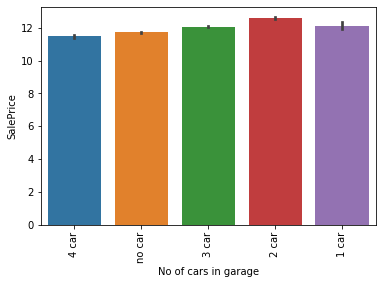

In [24]:
fig = sns.barplot(x='GarageCars', y='SalePrice', data=train_df)
fig.set_xticklabels(labels=['4 car', 'no car', '3 car', '2 car', '1 car'], rotation=90)
plt.xlabel('No of cars in garage')

In [25]:
# Checking max value count for each value to use it in plot
train_df['Fireplaces'].value_counts()

0    690
1    649
2    115
3      4
Name: Fireplaces, dtype: int64

Text(0.5, 0, 'No of fireplace')

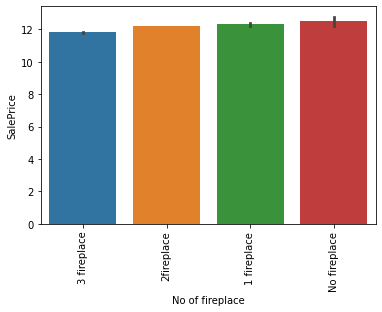

In [26]:
# Analysing Fireplaces against SalePrice
fig2 = sns.barplot(x='Fireplaces', y='SalePrice', data=train_df)
fig2.set_xticklabels(labels=['3 fireplace', '2fireplace', '1 fireplace', 'No fireplace'], rotation=90)
plt.xlabel('No of fireplace')

<h6>Analysing the skewness and kurtosis of some features to understand the 
variation of the data</h6>

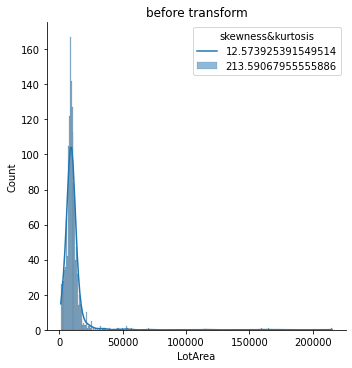

In [27]:
# Using displot instead of distplot which is deprecating in next version
sns.displot(x='LotArea', data=train_df, kde=True)
skew_ness = str(train_df['LotArea'].skew())
kurt_ = str(train_df['LotArea'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title("before transform")
plt.show()

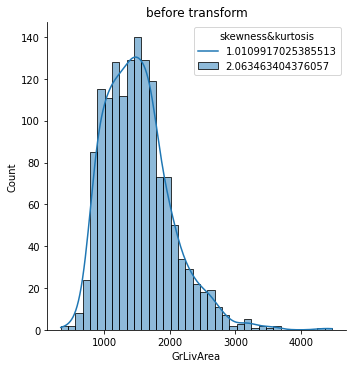

In [28]:
sns.displot(x='GrLivArea', data=train_df, kde=True)
skew_ness=str(train_df['GrLivArea'].skew())
kurt_=str(train_df['GrLivArea'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()


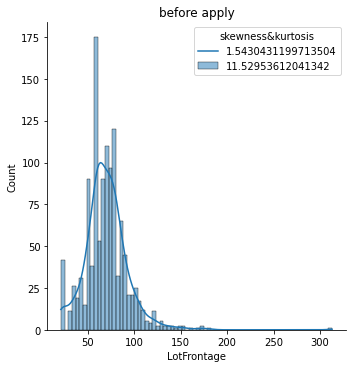

In [29]:
sns.displot(x=train_df['LotFrontage'],kde=True)
skew_ness = str(train_df['LotFrontage'].skew())
kurt_ = str(train_df['LotFrontage'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before apply')
plt.show()


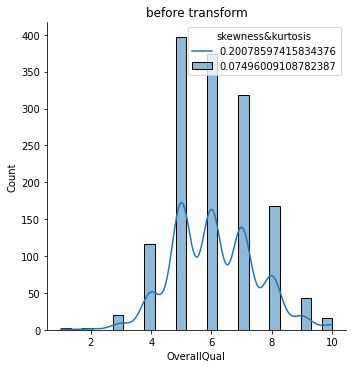

In [30]:
sns.displot(x='OverallQual', data=train_df, kde=True)
skew_ness = str(train_df['OverallQual'].skew())
kurt_ = str(train_df['OverallQual'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title("before transform")
plt.show()

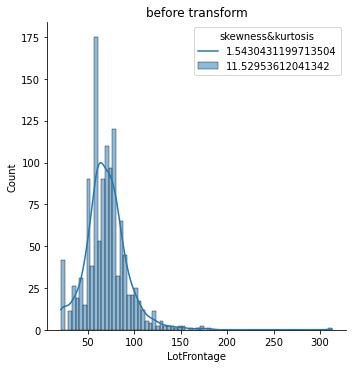

In [31]:
sns.displot(x='LotFrontage', data=train_df, kde=True)
skew_ness = str(train_df['LotFrontage'].skew())
kurt_ = str(train_df['LotFrontage'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()

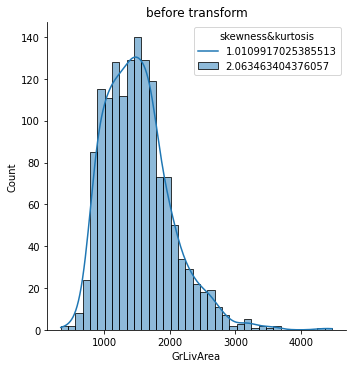

In [32]:
sns.displot(x='GrLivArea', data=train_df, kde=True)
skew_ness = str(train_df['GrLivArea'].skew())
kurt_ = str(train_df['GrLivArea'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()



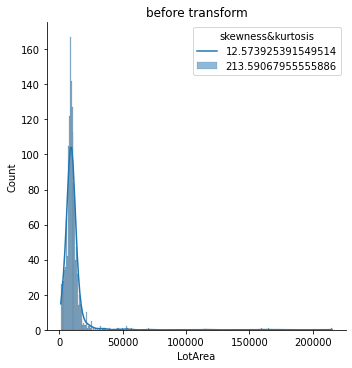

In [33]:
sns.displot(x='LotArea', data=train_df, kde=True)
skew_ness = str(train_df['LotArea'].skew())
kurt_ = str(train_df['LotArea'].kurt()) 
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()


In [34]:
# Saving the length of train and test and concatenating to make a single df
train_range = train_df.shape[0]  # 1458
test_range = test_df.shape[0]  # 1459
y_train = train_df.SalePrice.values # saving target variable
total_data = pd.concat((train_df, test_df)).reset_index(drop=True)

In [35]:
# shape of total_data
total_data.shape

(2917, 80)

In [36]:
# dropping target variable
total_data.drop(['SalePrice'], axis=1, inplace=True)
print("total_data size is : {}".format(total_data.shape))
total_data.head()

total_data size is : (2917, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [37]:
# Counting unique value in each categorical column
cat_col =total_data.select_dtypes(include=['object'])

for i in list(cat_col.columns):
    print("We have {} unique value in {} column: {}.".format(len(cat_col[i].unique()), 
                                                     i, cat_col[i].unique()))
    print('*'*140)

We have 6 unique value in MSZoning column: ['RL' 'RM' 'C (all)' 'FV' 'RH' nan].
********************************************************************************************************************************************
We have 2 unique value in Street column: ['Pave' 'Grvl'].
********************************************************************************************************************************************
We have 3 unique value in Alley column: [nan 'Grvl' 'Pave'].
********************************************************************************************************************************************
We have 4 unique value in LotShape column: ['Reg' 'IR1' 'IR2' 'IR3'].
********************************************************************************************************************************************
We have 4 unique value in LandContour column: ['Lvl' 'Bnk' 'Low' 'HLS'].
**********************************************************************************************

In [38]:
# divide data into categorical and numerical features
cat, num = [], []
for i in total_data.columns:
    d = total_data.dtypes[i]
    if d == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: {}".format(cat))
print("Numerical: {}".format(num))

Categorical: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'

In [39]:
# Checking length of categorical and numerical
print("Length of categorical: {}".format(len(cat)))
print("Length of numerical: {}".format(len(num)))

Length of categorical: 43
Length of numerical: 36


In [40]:
# Checking unique in catgeorical column by using our categorical list
for i in cat:
    print(i, "-"*(30-len(i)), len(total_data[i].unique()))

MSZoning ---------------------- 6
Street ------------------------ 2
Alley ------------------------- 3
LotShape ---------------------- 4
LandContour ------------------- 4
Utilities --------------------- 3
LotConfig --------------------- 5
LandSlope --------------------- 3
Neighborhood ------------------ 25
Condition1 -------------------- 9
Condition2 -------------------- 8
BldgType ---------------------- 5
HouseStyle -------------------- 8
RoofStyle --------------------- 6
RoofMatl ---------------------- 7
Exterior1st ------------------- 16
Exterior2nd ------------------- 17
MasVnrType -------------------- 5
ExterQual --------------------- 4
ExterCond --------------------- 5
Foundation -------------------- 6
BsmtQual ---------------------- 5
BsmtCond ---------------------- 5
BsmtExposure ------------------ 5
BsmtFinType1 ------------------ 7
BsmtFinType2 ------------------ 7
Heating ----------------------- 6
HeatingQC --------------------- 5
CentralAir -------------------- 2
Electrical 

In [47]:
# Checking %  of missing value in categorical features
cat_feature = [feature for feature in cat if total_data[feature].isnull().sum()]
for feature in cat_feature:
    print("{}: {} %".format(feature, round((total_data[feature].isnull().sum()
                                          /len(total_data[feature]))*100, 3)))

MSZoning: 0.137 %
Alley: 93.212 %
Utilities: 0.069 %
Exterior1st: 0.034 %
Exterior2nd: 0.034 %
MasVnrType: 0.823 %
BsmtQual: 2.777 %
BsmtCond: 2.811 %
BsmtExposure: 2.811 %
BsmtFinType1: 2.708 %
BsmtFinType2: 2.743 %
Electrical: 0.034 %
KitchenQual: 0.034 %
Functional: 0.069 %
FireplaceQu: 48.68 %
GarageType: 5.382 %
GarageFinish: 5.451 %
GarageQual: 5.451 %
GarageCond: 5.451 %
PoolQC: 99.691 %
Fence: 80.425 %
MiscFeature: 96.4 %
SaleType: 0.034 %


In [50]:
# missing % in numerical features
num_feature = [feature for feature in num if total_data[feature].isnull().sum()]
for feature in num_feature:
    print("{}: {} %".format(feature, round((total_data[feature].isnull().sum()
                                            /len(total_data[feature]))*100, 3)))

LotFrontage: 16.661 %
MasVnrArea: 0.788 %
BsmtFinSF1: 0.034 %
BsmtFinSF2: 0.034 %
BsmtUnfSF: 0.034 %
TotalBsmtSF: 0.034 %
BsmtFullBath: 0.069 %
BsmtHalfBath: 0.069 %
GarageYrBlt: 5.451 %
GarageCars: 0.034 %
GarageArea: 0.034 %


In [209]:
# missing value in overall whole data
total_data_na = (total_data.isnull().sum() / len(total_data)) * 100

total_data_na

MSSubClass        0.000000
MSZoning          0.137127
LotFrontage      16.660953
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.034282
SaleCondition     0.000000
Length: 79, dtype: float64

In [210]:
# Checking columns where there's no missing value
(total_data_na[total_data_na == 0].index)

Index(['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [211]:
# Another way to check missing ratios
total_data_na = total_data_na.drop(total_data_na[total_data_na == 0].index).sort_values(ascending=False)[:30]

total_data_na

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageFinish     5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Functional       0.068564
Utilities        0.068564
GarageArea       0.034282
GarageCars       0.034282
Electrical       0.034282
KitchenQual      0.034282
TotalBsmtSF      0.034282
BsmtUnfSF        0.034282
BsmtFinSF2       0.034282
dtype: float64

In [212]:
# creating dataframe of missing data values
missing_data = pd.DataFrame({'Missing Ratio' :total_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

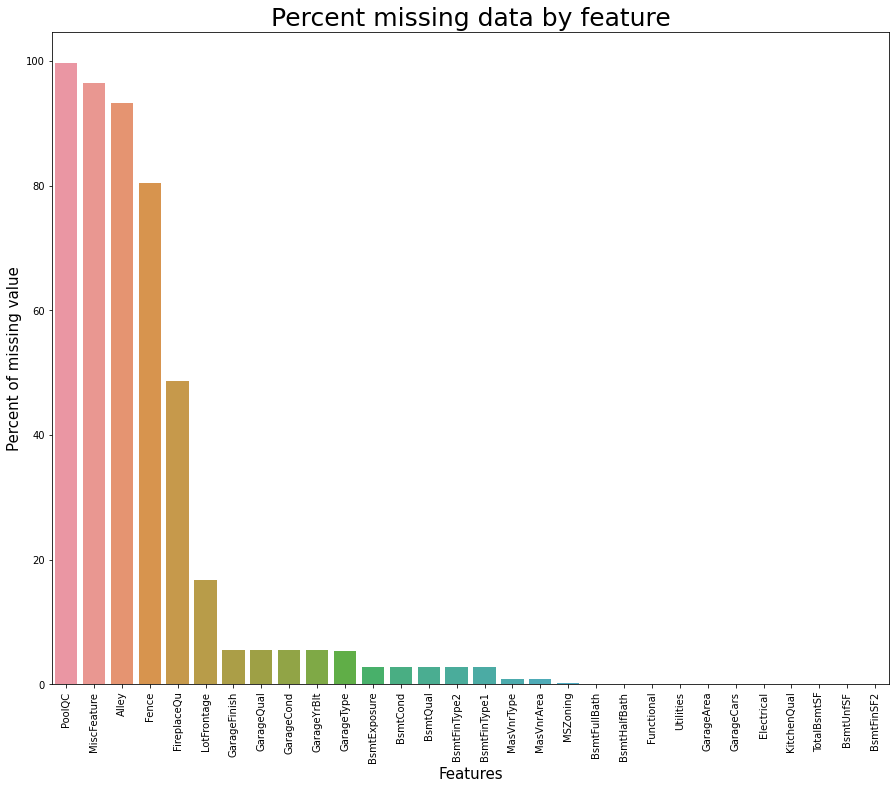

In [213]:
# plotting missing values
plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=total_data_na.index, y=total_data_na)

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing value', fontsize=15)
plt.title('Percent missing data by feature', fontsize=25)

<h6>poolQC - NA means no pool, so replacing with None</h6>
<h6>Miscfeature - NA means no miscfeature, so replacing with None</h6>
<h6>Alley - NA means no Alley access, so replacing with None</h6>
<h6>Fence - NA means no fence, so replacing with None</h6>
<h6>FireplaceQu - NA means no fireplace, so replacing with None</h6>

In [215]:
# Filling missing values with none values 
total_data["PoolQC"] = total_data["PoolQC"].fillna("None")
total_data["MiscFeature"] = total_data["MiscFeature"].fillna("None")
total_data["Alley"] = total_data["Alley"].fillna("None")
total_data["Fence"] = total_data["Fence"].fillna("None")
total_data["FireplaceQu"] = total_data["FireplaceQu"].fillna("None")

In [216]:
# Area of each street is connected so replacing missing value with median
total_data["LotFrontage"]=total_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [217]:
# replacing with most frequent value in the column which is None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    total_data[col] =total_data[col].fillna('None')

In [218]:
# Replacing missing with 0 (No garage = no cars in such garage)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total_data[col] = total_data[col].fillna(0)

In [219]:
# Missing value in these feature means no basement (replace with 0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total_data[col] = total_data[col].fillna(0)

In [220]:
# NaN means in these column is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    total_data[col] = total_data[col].fillna('None')

In [221]:
# NA means no masonry veneer for houses. (Fill zero for area and None for type)
total_data["MasVnrType"] = total_data["MasVnrType"].fillna("None")
total_data["MasVnrArea"] = total_data["MasVnrArea"].fillna(0)

# Filling MSZoning with most common value 'RL'
total_data['MSZoning'] = total_data['MSZoning'].fillna(total_data['MSZoning'].mode()[0])

# For Utilitites, most of the records are 'AllPub'. It won't help in prediction
total_data = total_data.drop(['Utilities'], axis=1)

# data description says- Assume typical(Typ) unless deductions are warranted
total_data["Functional"] = total_data["Functional"].fillna("Typ")

# replacing with most repeated "SBrkr" value
total_data['Electrical'] = total_data['Electrical'].fillna(total_data['Electrical'].mode()[0])

# set "TA" most frequent in place of missing value
total_data['KitchenQual'] = total_data['KitchenQual'].fillna(total_data['KitchenQual'].mode()[0])

# replacing with most common value 
total_data['Exterior1st'] = total_data['Exterior1st'].fillna(total_data['Exterior1st'].mode()[0])
total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna(total_data['Exterior2nd'].mode()[0])

# replacing with most common value again
total_data['SaleType'] = total_data['SaleType'].fillna(total_data['SaleType'].mode()[0])

# MSSubClass-type of dwelling, NA means no building class. (fill with None)
total_data['MSSubClass'] = total_data['MSSubClass'].fillna("None")

In [222]:
#Check remaining missing values if any 
total_data_na = (total_data.isnull().sum()/len(total_data))*100
total_data_na = total_data_na.drop(total_data_na[total_data_na==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({"missing ratio":total_data_na})
missing_data.head()

,missing ratio


In [223]:
# Converting some column feature who are int but should be str

total_data['MSSubClass'].dtype, total_data['YrSold'].dtype

(dtype('int64'), dtype('int64'))

In [224]:
#MSSubClass=The building class
total_data['MSSubClass'] = total_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
total_data['OverallCond'] = total_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
total_data['YrSold'] = total_data['YrSold'].astype(str)
total_data['MoSold'] = total_data['MoSold'].astype(str)

In [225]:
# process columns, apply LabelEncoder to categorical features
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(total_data[c].values))
    total_data[c] = lbl.transform(list(total_data[c].values))
# shape        
print('Shape all_data: {}'.format(total_data.shape))

Shape all_data: (2917, 78)


In [226]:
# Adding one extra feature -> total sqfootage feature 
total_data['TotalSF'] = total_data['TotalBsmtSF'] + total_data['1stFlrSF'] + total_data['2ndFlrSF']


In [227]:
# Checking numerical feature again
numeric_feats = total_data.dtypes[total_data.dtypes != 'object' ].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF'],
      dtype='object')

In [228]:
# Checking skewness level on numerical features to remove
skewed_feats = total_data[numeric_feats].apply(lambda x: skew(x.dropna())).\
sort_values(ascending=False)
skewness = pd.DataFrame({"Skewness ": skewed_feats})
skewness.head()

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [229]:
# Applying boxcox on those features having skewness > 0.75
skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    total_data[feat] = boxcox1p(total_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [230]:
total_data.shape


(2917, 79)

In [231]:
# Coverting features into dummies for expanding
# dimensions for convenient access
total_data = pd.get_dummies(total_data)
print(total_data.shape)

(2917, 220)


In [235]:
# Converting total data back to train and test
train = total_data[:train_range]
test = total_data[train_range:]
train.shape

(1458, 220)

In [236]:
# Importing different models to try on our dataset
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [237]:
n_folds = 5
# defining our own function to get root
# mean square value using 5 fold split
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [238]:
# Passing RobustScaler() to make the lasso model more robust to outlier
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

In [239]:
# Passing RobustScaler() to make the Enet model more robust to outlier
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005,
                                                l1_ratio=.9, random_state=3))

In [240]:
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [241]:
# passing huber loss to make it robust to outliers
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [242]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

<h6>Checking performance(score) of models</h6>

In [243]:

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [244]:
score = rmsle_cv(Enet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [245]:
score = rmsle_cv(krr)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [246]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1167 (0.0083)



In [247]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[17:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

<h6>Stacking of models</h6>

In [248]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X)
                                       for model in self.models_])
        return np.mean(predictions, axis=1)

In [249]:
# Averaging the score
averaged_models = AveragingModels(models = (Enet, GBoost, krr, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



<h6>Stacking using a meta model</h6>

In [250]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [251]:
# Averaging the score again
stacked_averaged_models = StackingAveragedModels(base_models = (Enet, GBoost, krr),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0073)


In [252]:
# defined function to get rmse
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [253]:
# Fitting the stacked model and predicting
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0783950609666492


In [254]:
# xgb model prediction
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[18:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.07876050033097799


In [255]:
#ensembling the model
ensemble = stacked_pred*0.70 + xgb_pred*0.30

In [ ]:
# creating submission file
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)